In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

In [2]:
df=pd.read_csv("D:/Project/Air.csv")

In [3]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length,Price,Total Stop,Delay
0,1,Jet Airways,269,Delhi,Cochin,3,205,3898,non-stop,1
1,2,IndiGo,1558,Kolkata,Banglore,3,222,7663,1 stop,1
2,3,Jet Airways,2400,Delhi,Cochin,3,165,13883,1 stop,1
3,4,Multiple carriers,2466,Delhi,Cochin,3,195,6219,1 stop,1
4,5,Air Asia,108,Banglore,Delhi,3,202,13303,1 stop,0
...,...,...,...,...,...,...,...,...,...,...
311,312,Air India,5479,Kolkata,Banglore,3,120,14715,1 stop,0
312,313,Air India,5491,Kolkata,Banglore,3,98,9900,1 stop,0
313,314,Jet Airways,5507,Kolkata,Banglore,3,102,14872,1 stop,0
314,315,Air India,5564,Mumbai,Hyderabad,3,88,7296,non-stop,1


In [4]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length,Price,Total Stop,Delay
0,1,Jet Airways,269,Delhi,Cochin,3,205,3898,non-stop,1
1,2,IndiGo,1558,Kolkata,Banglore,3,222,7663,1 stop,1
2,3,Jet Airways,2400,Delhi,Cochin,3,165,13883,1 stop,1
3,4,Multiple carriers,2466,Delhi,Cochin,3,195,6219,1 stop,1
4,5,Air Asia,108,Banglore,Delhi,3,202,13303,1 stop,0


In [5]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Length', 'Price', 'Total Stop', 'Delay'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           316 non-null    int64 
 1   Airline      316 non-null    object
 2   Flight       316 non-null    int64 
 3   AirportFrom  316 non-null    object
 4   AirportTo    316 non-null    object
 5   DayOfWeek    316 non-null    int64 
 6   Length       316 non-null    int64 
 7   Price        316 non-null    int64 
 8   Total Stop   316 non-null    object
 9   Delay        316 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 24.8+ KB


In [7]:
df.size  # Size of DataSet Total Number Present in Dataset

3160

In [8]:
df.shape # Shape of Dataset Total Row And Columns Present In Dataset

(316, 10)

In [9]:
df.isnull().sum() #Checking Null Values Of Dataset

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Length         0
Price          0
Total Stop     0
Delay          0
dtype: int64

In [10]:
df.isnull().sum().sum() #Total Null Value

0

# Performing LabelEncoding On DataSet

In [11]:
le=LabelEncoder()     # To convert categorical data into numerical data for model building

In [12]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length,Price,Total Stop,Delay
0,1,Jet Airways,269,Delhi,Cochin,3,205,3898,non-stop,1
1,2,IndiGo,1558,Kolkata,Banglore,3,222,7663,1 stop,1
2,3,Jet Airways,2400,Delhi,Cochin,3,165,13883,1 stop,1
3,4,Multiple carriers,2466,Delhi,Cochin,3,195,6219,1 stop,1
4,5,Air Asia,108,Banglore,Delhi,3,202,13303,1 stop,0
...,...,...,...,...,...,...,...,...,...,...
311,312,Air India,5479,Kolkata,Banglore,3,120,14715,1 stop,0
312,313,Air India,5491,Kolkata,Banglore,3,98,9900,1 stop,0
313,314,Jet Airways,5507,Kolkata,Banglore,3,102,14872,1 stop,0
314,315,Air India,5564,Mumbai,Hyderabad,3,88,7296,non-stop,1


In [13]:
df["Airline"]=le.fit_transform(df["Airline"])
df["AirportFrom"]=le.fit_transform(df["AirportFrom"])
df["AirportTo"]=le.fit_transform(df["AirportTo"])
df["Total Stop"]=le.fit_transform(df["Total Stop"])

In [14]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length,Price,Total Stop,Delay
0,1,4,269,2,1,3,205,3898,1,1
1,2,3,1558,3,0,3,222,7663,0,1
2,3,4,2400,2,1,3,165,13883,0,1
3,4,5,2466,2,1,3,195,6219,0,1
4,5,0,108,0,2,3,202,13303,0,0


In [15]:
df.describe().T       # Statistical Summary Of Dataset

,count,mean,std,min,25%,50%,75%,max
id,316.0,158.500000,91.365566,1.0,79.75,158.5,237.25,316.0
Airline,316.0,3.645570,1.769498,0.0,3.00,4.0,5.00,8.0
Flight,316.0,2712.158228,2022.387751,17.0,1127.75,2214.0,4034.00,7781.0
AirportFrom,316.0,1.981013,1.200378,0.0,2.00,2.0,3.00,4.0
AirportTo,316.0,1.398734,1.492584,0.0,0.00,1.0,2.00,5.0
DayOfWeek,316.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0
Length,316.0,125.348101,61.116587,32.0,76.00,115.0,165.00,380.0
Price,316.0,8888.636076,4215.393097,1966.0,5118.00,8243.0,12374.00,27431.0
Total Stop,316.0,0.338608,0.473987,0.0,0.00,0.0,1.00,1.0
Delay,316.0,0.215190,0.411606,0.0,0.00,0.0,0.00,1.0


In [16]:
df.dtypes

id             int64
Airline        int32
Flight         int64
AirportFrom    int32
AirportTo      int32
DayOfWeek      int64
Length         int64
Price          int64
Total Stop     int32
Delay          int64
dtype: object

# Removing Outliers present in Dataset

<Axes: >

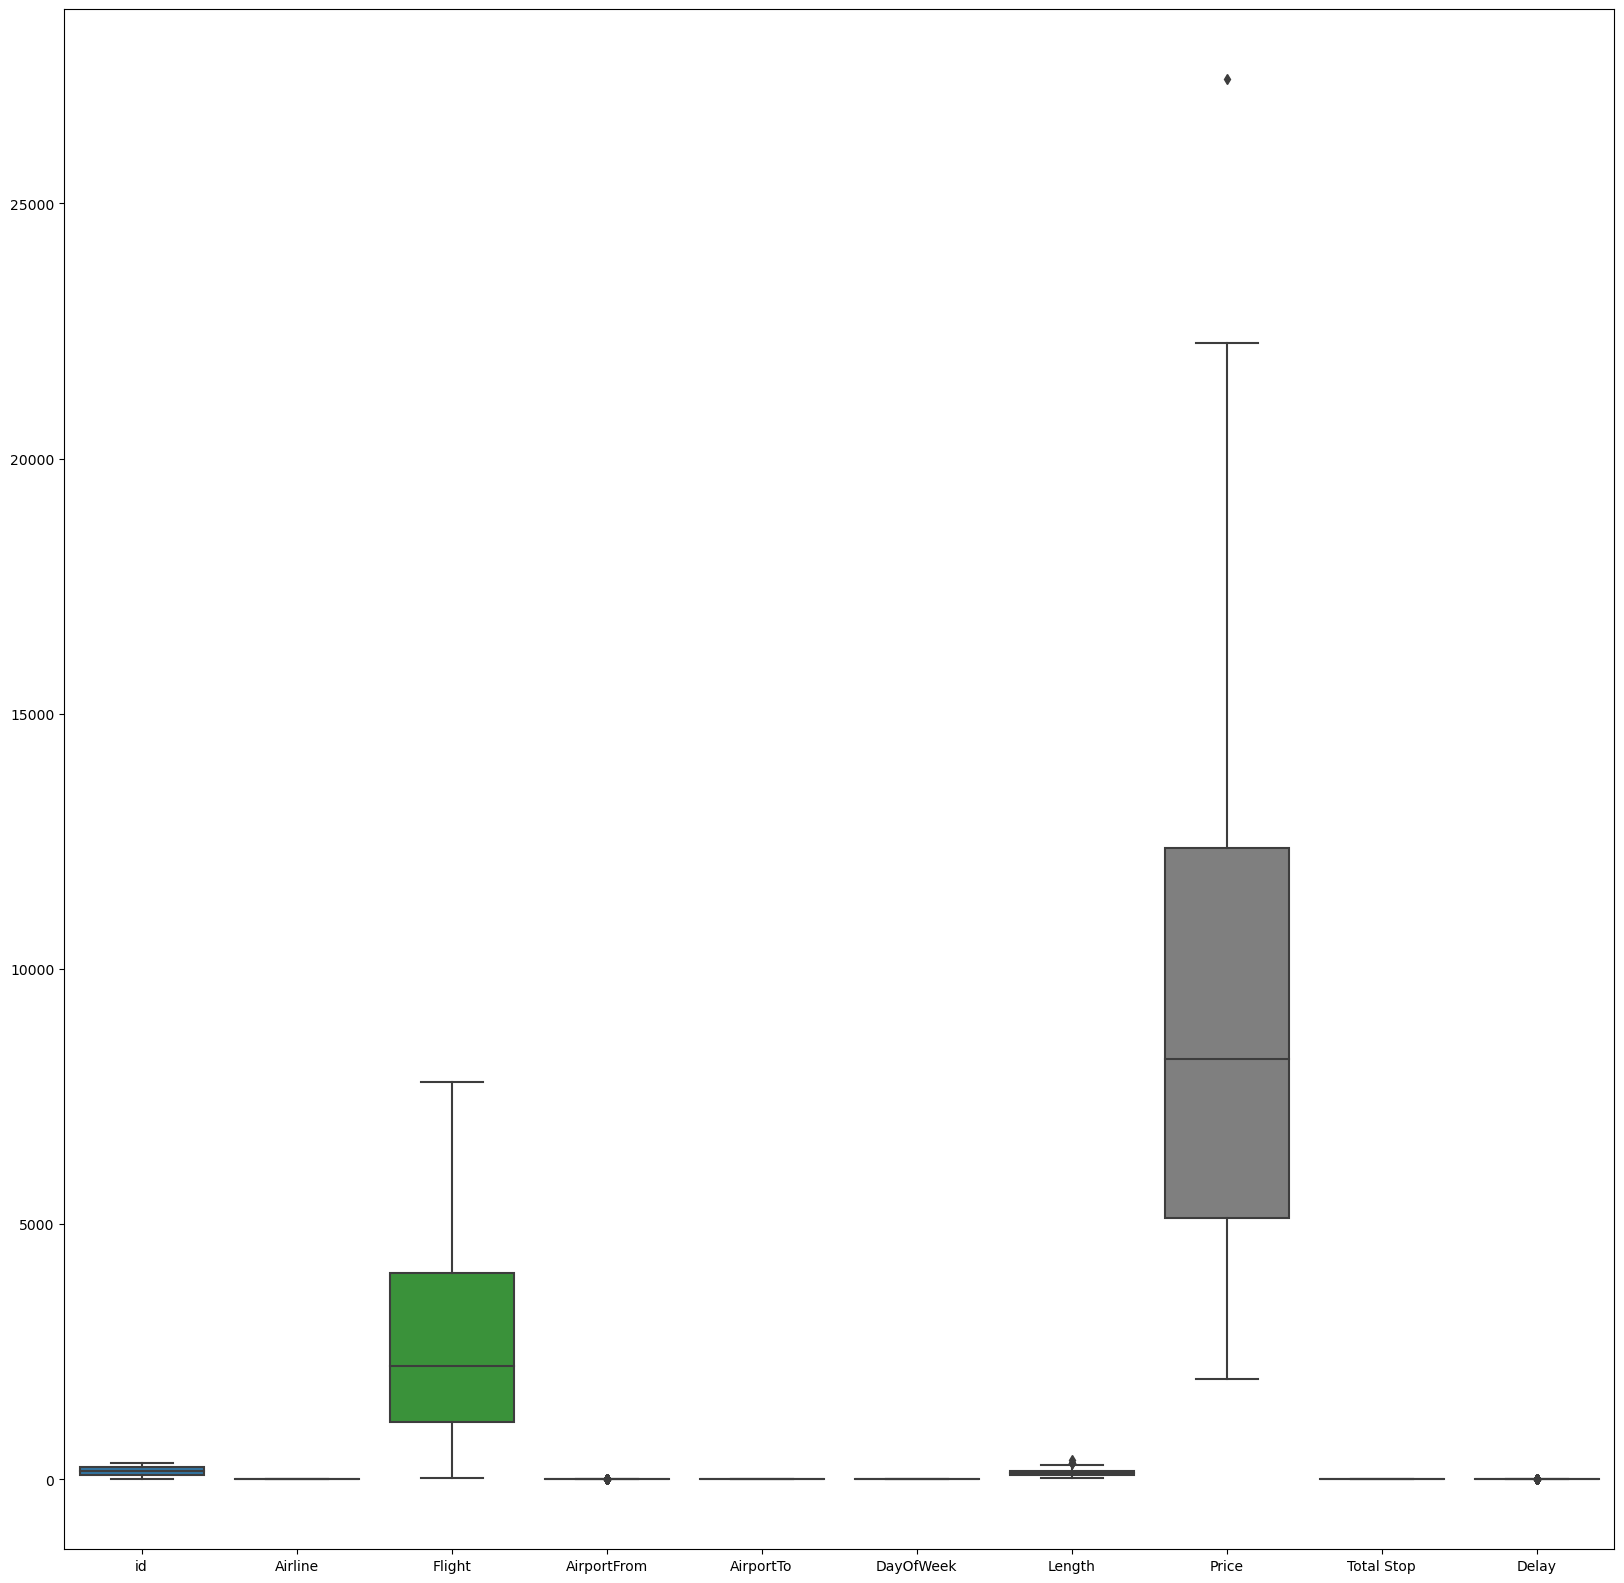

In [17]:
plt.figure(figsize=(20,20))        # Ploting Boxplot to detect outliers
sns.boxplot(data=df)

In [18]:
#Steps to Remove Outliers

In [19]:
Q1=df.quantile(q=0.25)         # finding Q1 value
Q3=df.quantile(q=0.75)         # Finding Q3 value
IQR=Q3-Q1                       # Finding IQR Value i.e(InterQuantileRange)
upper=Q3+(1.5*IQR)              # to detect upper outliers
lower=Q1-(1.5*IQR)              # to detect lower outliers

In [20]:
df1=df[~((df>upper)|(df<lower))]

<Axes: >

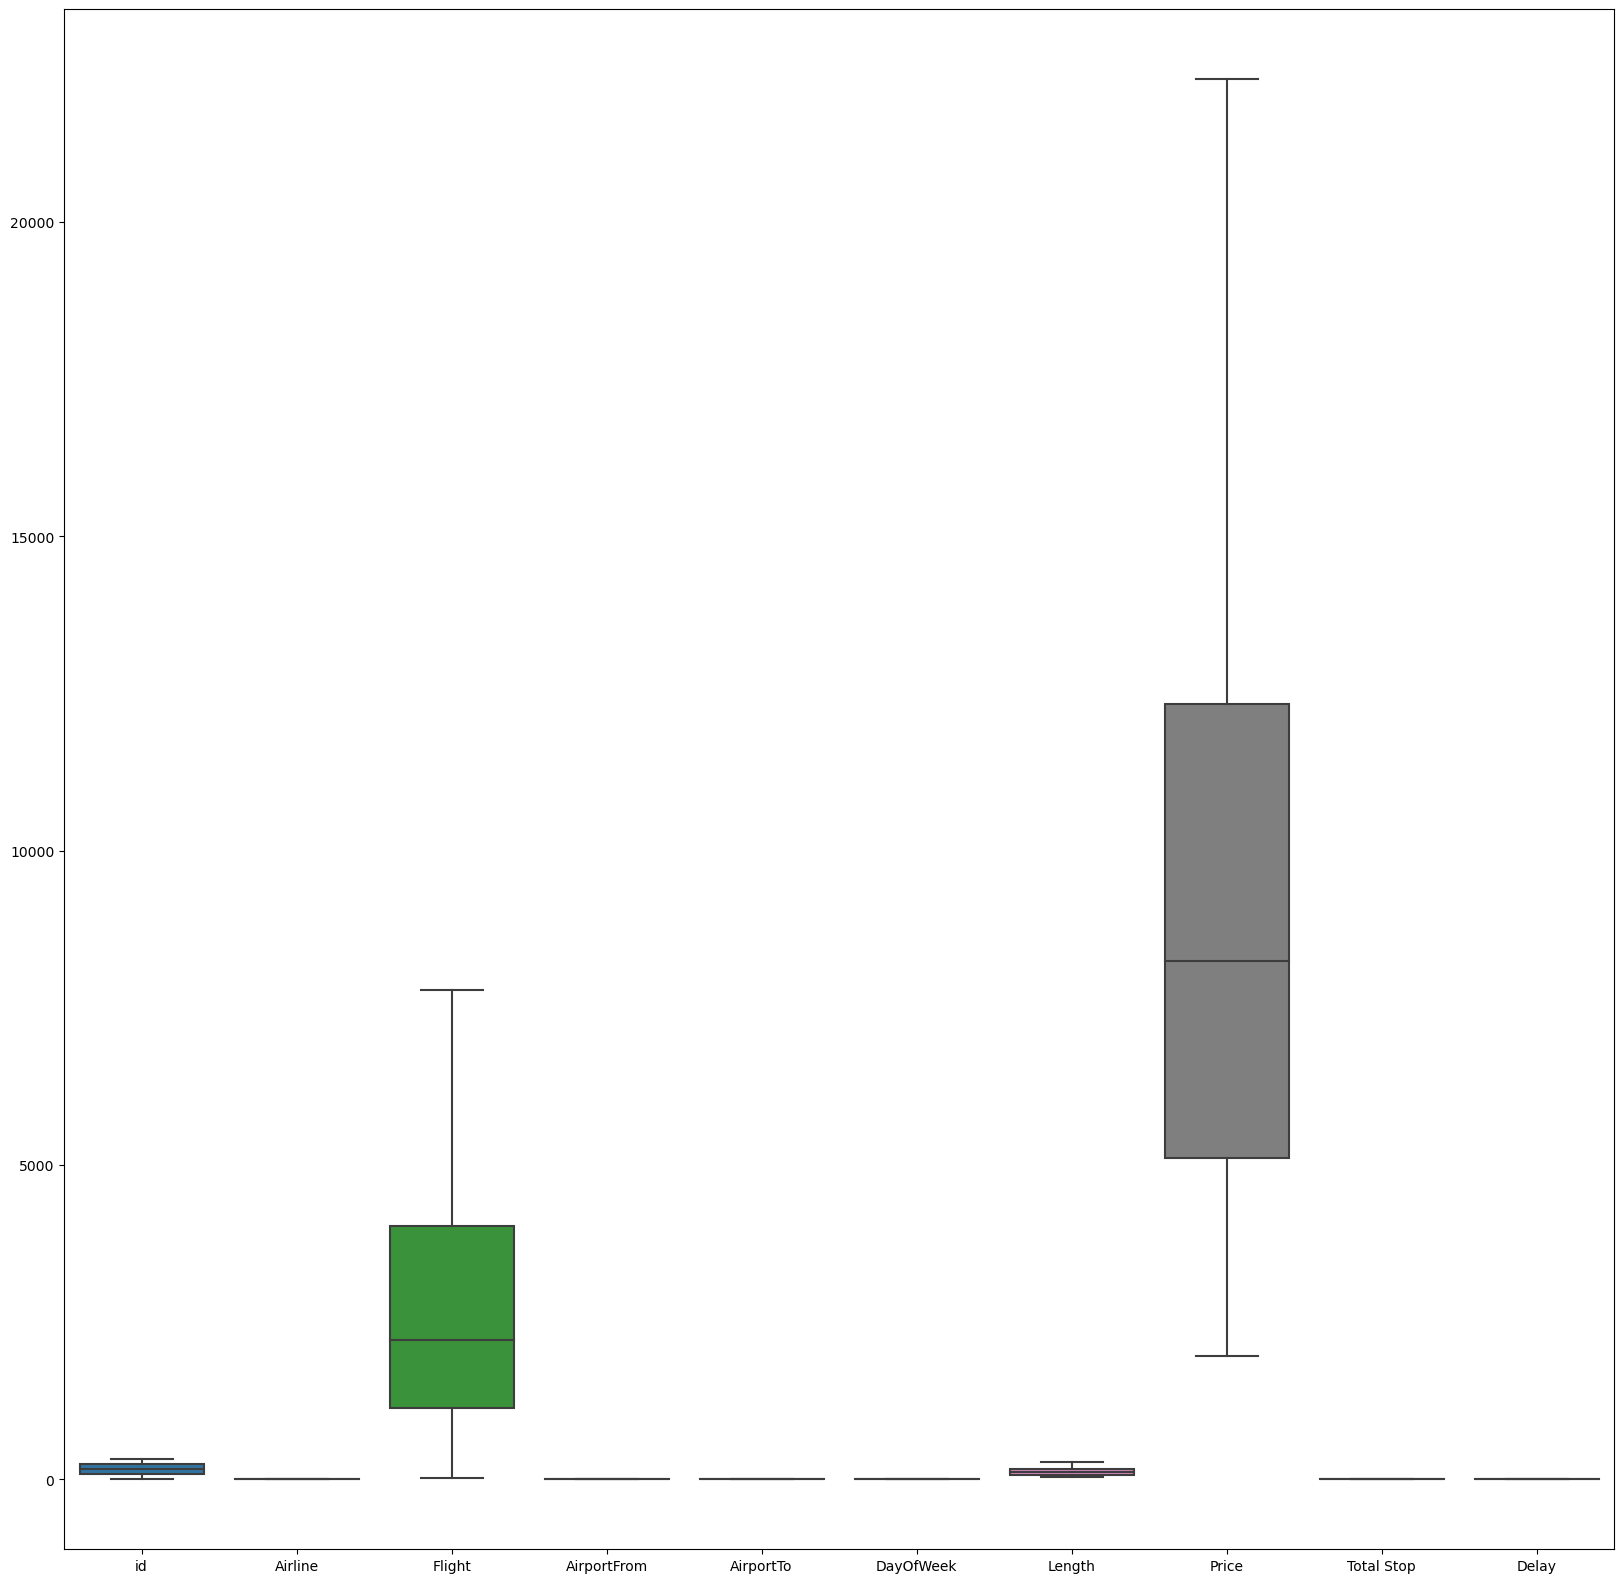

In [21]:
plt.figure(figsize=(20,20))          # Boxplot after removing Outliers
sns.boxplot(data=df1)

In [22]:
 df1.isnull().sum() 

id              0
Airline         0
Flight          0
AirportFrom    67
AirportTo       0
DayOfWeek       0
Length          4
Price           1
Total Stop      0
Delay          68
dtype: int64

In [23]:
df1

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length,Price,Total Stop,Delay
0,1,4,269,2.0,1,3,205.0,3898.0,1,NaN
1,2,3,1558,3.0,0,3,222.0,7663.0,0,NaN
2,3,4,2400,2.0,1,3,165.0,13883.0,0,NaN
3,4,5,2466,2.0,1,3,195.0,6219.0,0,NaN
4,5,0,108,NaN,2,3,202.0,13303.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
311,312,1,5479,3.0,0,3,120.0,14715.0,0,0.0
312,313,1,5491,3.0,0,3,98.0,9900.0,0,0.0
313,314,4,5507,3.0,0,3,102.0,14872.0,0,0.0
314,315,1,5564,4.0,3,3,88.0,7296.0,1,NaN


In [24]:
df2=df1.dropna()     # removing that nan values

In [25]:
df2

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length,Price,Total Stop,Delay
7,8,3,2722,3.0,0,3,228.0,22271.0,0,0.0
12,13,5,2055,2.0,1,3,210.0,4668.0,1,0.0
14,15,4,132,2.0,1,3,215.0,4805.0,1,0.0
16,17,5,98,2.0,1,3,213.0,5831.0,0,0.0
17,18,7,1496,3.0,0,3,162.0,10263.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
306,307,4,5366,3.0,0,3,119.0,9135.0,0,0.0
311,312,1,5479,3.0,0,3,120.0,14715.0,0,0.0
312,313,1,5491,3.0,0,3,98.0,9900.0,0,0.0
313,314,4,5507,3.0,0,3,102.0,14872.0,0,0.0


In [26]:
df2.drop(["Delay"],axis=1,inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_12224\591671106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["Delay"],axis=1,inplace=True)


In [27]:
df2.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length,Price,Total Stop
7,8,3,2722,3.0,0,3,228.0,22271.0,0
12,13,5,2055,2.0,1,3,210.0,4668.0,1
14,15,4,132,2.0,1,3,215.0,4805.0,1
16,17,5,98,2.0,1,3,213.0,5831.0,0
17,18,7,1496,3.0,0,3,162.0,10263.0,0


In [28]:
df2.isnull().sum().sum()

0

# HeatMap To Show Corelation between Data

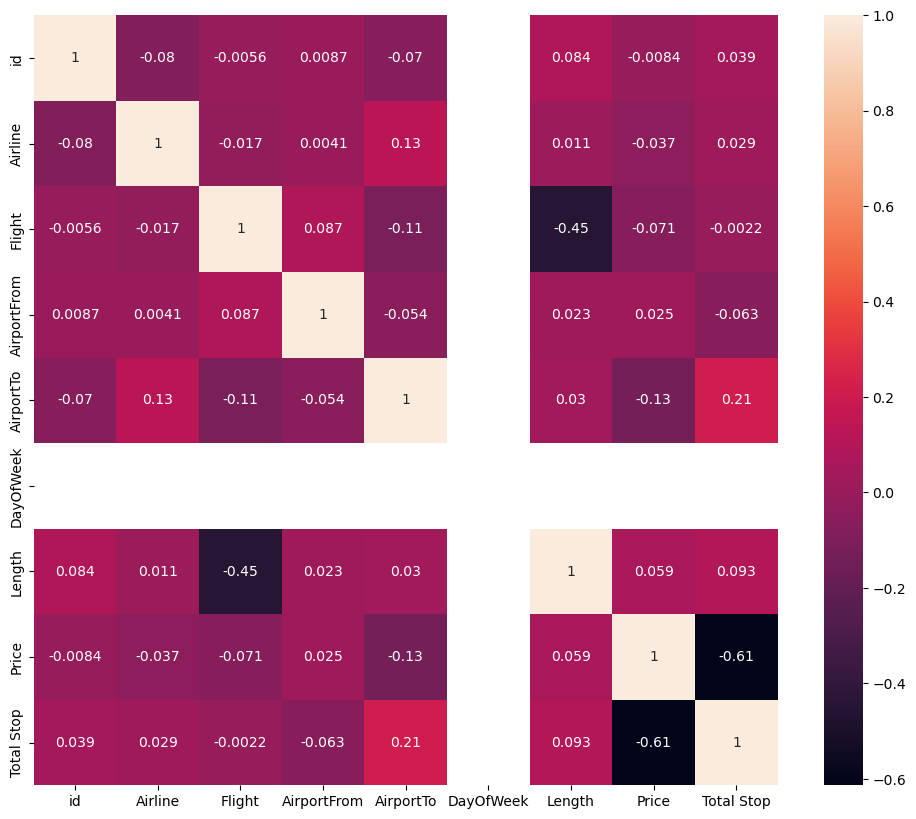

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [30]:
df2

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Length,Price,Total Stop
7,8,3,2722,3.0,0,3,228.0,22271.0,0
12,13,5,2055,2.0,1,3,210.0,4668.0,1
14,15,4,132,2.0,1,3,215.0,4805.0,1
16,17,5,98,2.0,1,3,213.0,5831.0,0
17,18,7,1496,3.0,0,3,162.0,10263.0,0
...,...,...,...,...,...,...,...,...,...
306,307,4,5366,3.0,0,3,119.0,9135.0,0
311,312,1,5479,3.0,0,3,120.0,14715.0,0
312,313,1,5491,3.0,0,3,98.0,9900.0,0
313,314,4,5507,3.0,0,3,102.0,14872.0,0


In [31]:
print(df2["Total Stop"].unique())

[0 1]


In [32]:
print(df2["Total Stop"].value_counts(normalize=True)*100)

Total Stop
0    67.357513
1    32.642487
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x1e9d08f0ed0>,
 [Text(-0.5705443762240192, 0.9404674979812674, 'Non Stop'),
  Text(0.5705444642769384, -0.9404674445630435, '1 stop')])

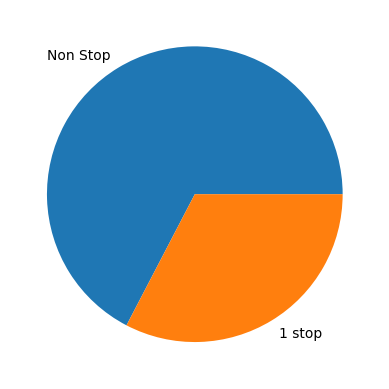

In [33]:
plt.pie(df2["Total Stop"].value_counts(normalize=True)*100,labels=["Non Stop","1 stop"])

# Model Building for DataSet

In [34]:
x=df2.drop(["Total Stop"],axis=1)
y=df2["Total Stop"]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)    # splliting data into x and y

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 8)
(58, 8)
(135,)
(58,)


# LOGISTIC REGRESSION ALGORITHM

In [37]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_true,y_pred=y_test,lr.predict(x_test)

In [39]:
lr.score(x_train,y_train)*100

90.37037037037037

In [40]:
lr.score(x_test,y_test)*100

81.03448275862068

In [41]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

63.63636363636363
82.35294117647058
81.03448275862068


# RandomForestClassifier

In [42]:
rf=RandomForestClassifier(n_estimators=6,random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=6, random_state=1)

In [43]:
y_true,y_pred=y_test,rf.predict(x_test)

In [44]:
rf.score(x_train,y_train)*100

97.77777777777777

In [45]:
rf.score(x_test,y_test)*100

87.93103448275862

In [46]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

85.71428571428571
70.58823529411765
87.93103448275862


# DecisionTreeClassifier

In [47]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [48]:
y_true,y_pred=y_test,dt.predict(x_test)

In [49]:
dt.score(x_train,y_train)*100

91.85185185185185

In [50]:
dt.score(x_test,y_test)*100

87.93103448275862

In [51]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

77.77777777777779
82.35294117647058
87.93103448275862


# GRADIENT BOOSTING CLASSIFIER ALGORITHM

In [52]:
gb=GradientBoostingClassifier(n_estimators=20)
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=20)

In [53]:
y_true,y_pred=y_test,gb.predict(x_test)

In [54]:
gb.score(x_train,y_train)*100

94.81481481481482

In [55]:
gb.score(x_test,y_test)*100

84.48275862068965

In [56]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

70.0
82.35294117647058
84.48275862068965


# BAGGING CLASSIFIER ALGORITHM

In [57]:
bg=BaggingClassifier(n_estimators=20)
bg.fit(x_train,y_train)

BaggingClassifier(n_estimators=20)

In [58]:
y_true,y_pred=y_test,bg.predict(x_test)

In [59]:
bg.score(x_train,y_train)*100

100.0

In [60]:
bg.score(x_test,y_test)*100

87.93103448275862

In [61]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

75.0
88.23529411764706
87.93103448275862


# ADABOOST CLASSIFIER ALGORITHM

In [62]:
ad=AdaBoostClassifier(n_estimators=20,estimator=dt,random_state=1)
ad.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=1),
                   n_estimators=20, random_state=1)

In [63]:
y_true,y_pred=y_test,ad.predict(x_test)

In [64]:
ad.score(x_train,y_train)*100

100.0

In [65]:
ad.score(x_test,y_test)*100

81.03448275862068

In [66]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

65.0
76.47058823529412
81.03448275862068


# KNeighbors CLASSIFIER ALGORITHM

In [67]:
kn=KNeighborsClassifier(weights="distance")
kn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [68]:
y_true,y_pred=y_test,kn.predict(x_test)

In [69]:
kn.score(x_train,y_train)*100

100.0

In [70]:
kn.score(x_test,y_test)*100

79.3103448275862

In [71]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

61.904761904761905
76.47058823529412
79.3103448275862


# SVC (SUPPORT VECTOR CLASSIFIER) ALGORITHM

In [72]:
svc=SVC(C=1.0,kernel="linear")
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [73]:
y_true,y_pred=y_test,svc.predict(x_test)

In [74]:
svc.score(x_train,y_train)*100

88.88888888888889

In [75]:
svc.score(x_test,y_test)*100

81.03448275862068

In [76]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

65.0
76.47058823529412
81.03448275862068
